# App Rating Prediction

## DESCRIPTION

### Objective: 
**Make a model to predict the app rating, with other information about the app provided.**

### Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

### Domain: General

### Analysis to be done: 
The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

### Fields in the data-

- App: Application name

- Category: Category to which the app belongs 

- Rating: Overall user rating of the app

- Reviews: Number of user reviews for the app

- Size: Size of the app in Kb/Mb

- Installs: Number of user downloads/installs for the app

- Type: Paid or Free

- Price: Price of the app

- Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

- Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.

- Last Updated: Date when the app was last updated on Play Store

- Current Ver: Current version of the app available on Play Store

- Android Ver: Minimum required Android version

In [229]:
# Importing all the tools (packages) required

%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## 1. Load the data file using pandas as a dataframe. 

In [230]:
warnings.filterwarnings('ignore')

df = pd.read_csv('googleplaystore.csv')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [231]:
df.info()  # to get the better understanding of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 2. Check for NULL values in the dataset. 
**Showing the number of NULL values for each column.**

In [232]:
df.isnull().sum() 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 3. Drop records with nulls in any of the columns. 

In [233]:
df.shape            # Complete dataset has 10841 rows and 13 columns with NULL

(10841, 13)

In [234]:
df.dropna(inplace = True) # Drop NA or NULL values

In [235]:
df.shape          # Dataset after DROPNA 

(9360, 13)

## 4. Variables seem to have incorrect type and inconsistent formatting. 


- #### 4.1 "Size" column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

In [236]:
df.Size.unique() # To show the inconsistency in App Size

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [237]:
'''
1. Extract Value
2. Check if its M or K in the end
3. If 'M' then multiply the value by 1000 to convert it into kB as a float datatype.
4. If 'K' then keep it as is and convert it into a float datatype. 

'''

def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None

In [238]:
df['formated_size']= df['Size'].apply(change_size)

In [239]:
df['formated_size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+03, 2.50e+04, 2.80e+03, 5.60e+03,
       2.90e+04, 3.30e+04, 3.10e+03, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 5.50e+03, 1.70e+04, 3.90e+04, 3.10e+04,
       4.20e+03, 2.30e+04, 6.00e+03, 6.10e+03, 4.60e+03, 9.20e+03,
       5.20e+03, 1.10e+04, 2.40e+04,      nan, 9.40e+03, 1.50e+04,
       1.00e+04, 1.20e+03, 2.60e+04, 8.00e+03, 7.90e+03, 5.60e+04,
       5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02, 3.60e+03, 5.70e+03,
       8.60e+03, 2.40e+03, 2.70e+04, 2.70e+03, 2.50e+03, 7.00e+03,
       1.60e+04, 3.40e+03, 8.90e+03, 3.90e+03, 2.90e+03, 3.80e+04,
       3.20e+04, 5.40e+03, 1.80e+04, 1.10e+03, 2.20e+03, 4.50e+03,
       9.80e+03, 5.20e+04, 9.00e+03, 6.70e+03, 3.00e+04, 2.60e+03,
       7.10e+03, 2.20e+04, 6.40e+03, 3.20e+03, 8.20e+03, 4.90e+03,
       9.50e+03, 5.00e+03, 5.90e+03, 1.30e+04, 7.30e+04, 6.80e+03,
       3.50e+03, 4.00e+03, 2.30e+03, 2.10e+03, 4.20e+04, 9.10e+03,
       5.50e+04, 2.30e+01, 7.30e+03, 6.50e+03, 1.50e+03, 7.50e

In [240]:
df["Size"]= df["formated_size"]

In [241]:
df.Size.shape

(9360,)

In [242]:
df['Size'].isnull().sum()

1637

In [243]:
df.dropna(subset=['Size'],inplace=True)

In [244]:
df.Size.shape

(7723,)

In [245]:
df['Size'].isnull().sum()

0

#### - 4.2 "Reviews" is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [246]:
df.Reviews.dtype

dtype('O')

In [247]:
df.Reviews = df.Reviews.astype('float64')

In [248]:
df.Reviews.dtype

dtype('float64')

#### - 4.3 "Installs" field is currently stored as string and has values like 1,000,000+. 

- Treat 1,000,000+ as 1,000,000

- remove ‘+’, ‘,’ from the field, convert it to integer

In [249]:
df.Installs = df.Installs.str.replace('+','').str.replace(',','').astype('int64')

In [250]:
df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,        100,        500,         10,
       1000000000,          5,         50,          1], dtype=int64)

#### - 4.4 Price field is a string and has '$' symbol. Remove dollar sign, and convert it to numeric.

In [251]:
df.Price.unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [252]:
df.Price = df.Price.str.replace('$','').astype('float64')

In [253]:
df.Price.unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

## 5. Sanity checks:

#### 5.1 -  Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [255]:
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [257]:
df= df[(df.Rating >= 1) | (df.Rating <=5)]
df.shape

(7723, 14)

#### 5.2 - Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [259]:
sanity_check_row = df[df.Reviews > df.Installs].index
df.drop(sanity_check_row, inplace = True)
df.shape

(7717, 14)

#### 5.3 - For free apps (type = “Free”), the price should not be >0. Drop any such row

In [260]:
# checking if there is any such row with Type as Free and Price >0
np.unique(df.Type[0]) == np.unique(df.Price[0])


False

False means there is no such case where Type = Free and also Price is >0

## 5. Performing univariate analysis: 

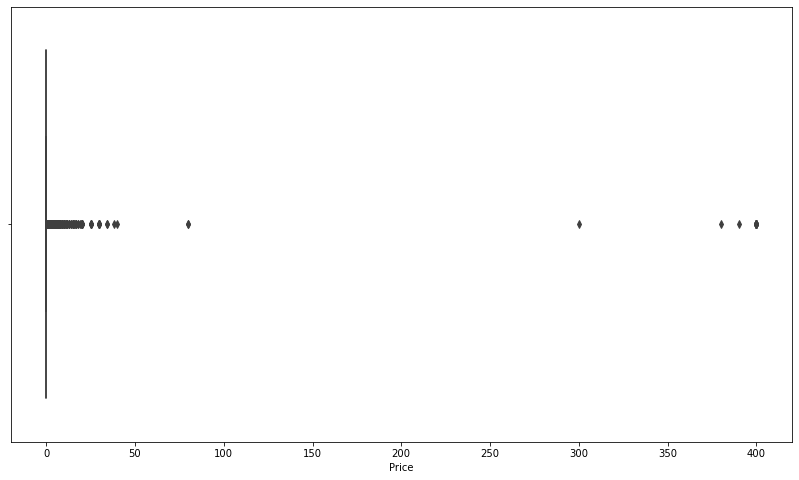

In [261]:
#----Boxplot for Price

plt.figure(figsize=[14,8])
sns.boxplot(x='Price', data=df)
plt.show()

**Questions:** Are there any outliers? Think about the price of usual apps on Play Store.

**Answer:** Yes, there are outliers present in Price and anything above 50 should be removed.



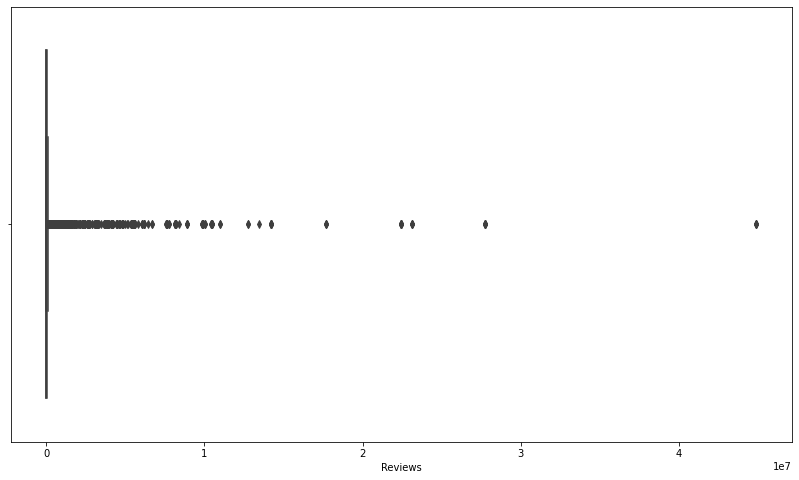

In [262]:
# ---- Boxplot for Reviews

plt.figure(figsize=[14,8])
sns.boxplot(df['Reviews'])
plt.show()

#seems there is one outlier, the value seems correct because its in limit.

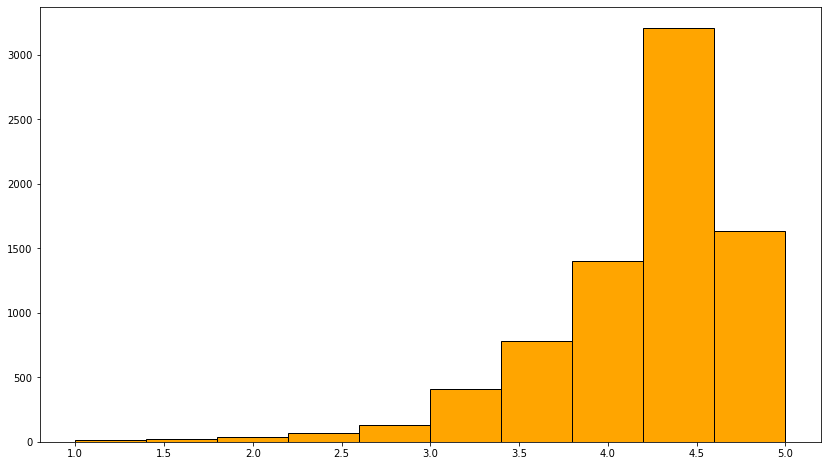

In [265]:
# Histogram for Rating

plt.figure(figsize=[14,8])
plt.hist(df['Rating'], color="Orange", edgecolor='black')
plt.show()

# How are the ratings distributed? Is it more toward higher ratings?
#Very few apps have less no.of Ratings, there are more towards higher Ratings

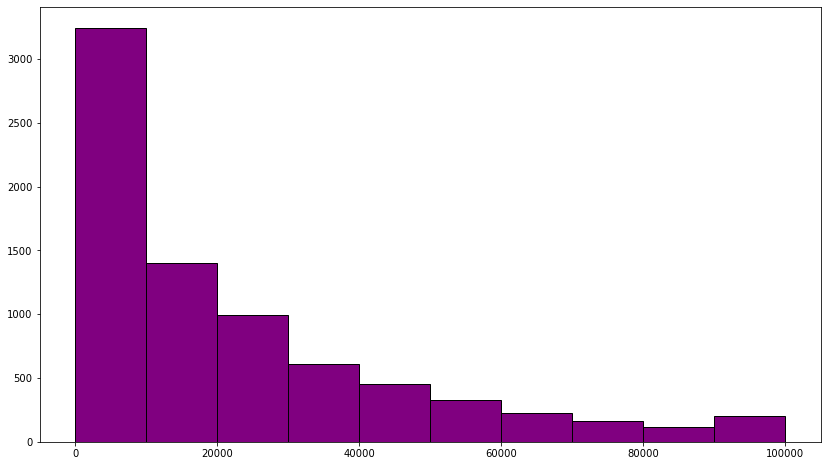

In [266]:
# Histogram for Size

plt.figure(figsize=[14,8])
plt.hist(df.Size, color='Purple',edgecolor='black')
plt.show()

## 6. Outlier treatment: 

6:1 Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
6:1: Check out the records with very high price

6:1:1 Is 200 indeed a high price?

6:1:2 Drop these as most seem to be junk apps

In [28]:
df["Price"].unique()  # there are values more than $200 

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [29]:
values_more_than_200 = df[(df.Price>=200)].index

In [30]:
df.drop(values_more_than_200, axis=0, inplace=True)

In [31]:
df.shape # values more than $200 are now removed

(7702, 14)

<AxesSubplot:xlabel='Price'>

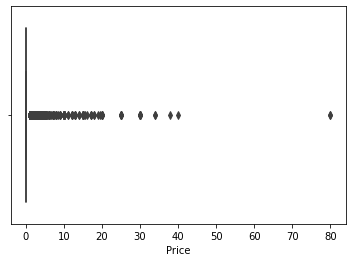

In [32]:
sns.boxplot(df['Price'])  # no data points more than $200

**6:2 Reviews: Very few apps have very high number of reviews.** 

- These are all star apps that don’t help with the analysis and, in fact, will skew it.

- Drop records having more than 2 million reviews.


sns.boxplot(df.Reviews)

In [33]:
reviews_more_than_2M = df[(df['Reviews']>2000000)].index

In [34]:
df.drop(reviews_more_than_2M, inplace=True)

In [35]:
df.shape   # Reviews more than $2M removed

(7483, 14)

<AxesSubplot:xlabel='Reviews'>

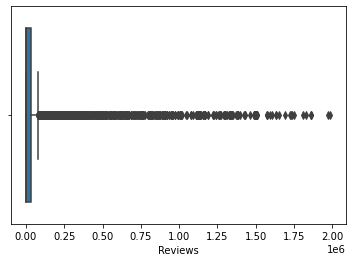

In [36]:
sns.boxplot(df.Reviews)

**6:3 Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.**

- Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

- Decide a threshold as cutoff for outlier and drop records having values more than that

<AxesSubplot:xlabel='Installs'>

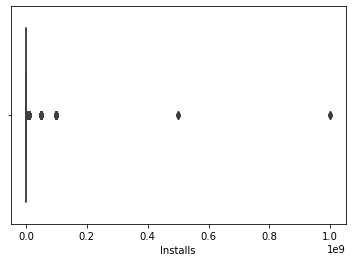

In [37]:
sns.boxplot(df['Installs'])

In [38]:
df.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64

In [39]:
df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,        100,        500,         10,          5,
               50,  500000000, 1000000000], dtype=int64)

In [40]:
df.drop(df[(df.Installs>=10000000.0)].index, axis=0, inplace= True)

In [41]:
df.shape

(6489, 14)

## 7. Bivariate analysis:

**8.1 Make scatter plot/joinplot for Rating vs. Price**

--What pattern do you observe? Does rating increase with price?



Text(0.5, 1.0, 'Rating vs Price')

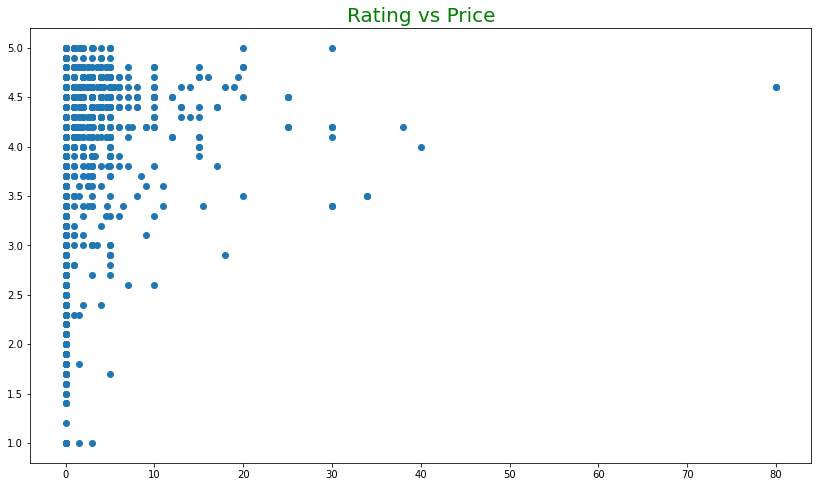

In [42]:
plt.figure(figsize=[14,8])
plt.scatter(x=df.Price,y=df.Rating)
plt.title('Rating vs Price',loc='Center', fontsize=20, color='green')


# here it can be observed that most apps with high price have ratings >3 also ratings increase with the price

**8.2 Make scatter plot/joinplot for Rating vs. Size**

--Are heavier apps rated better?



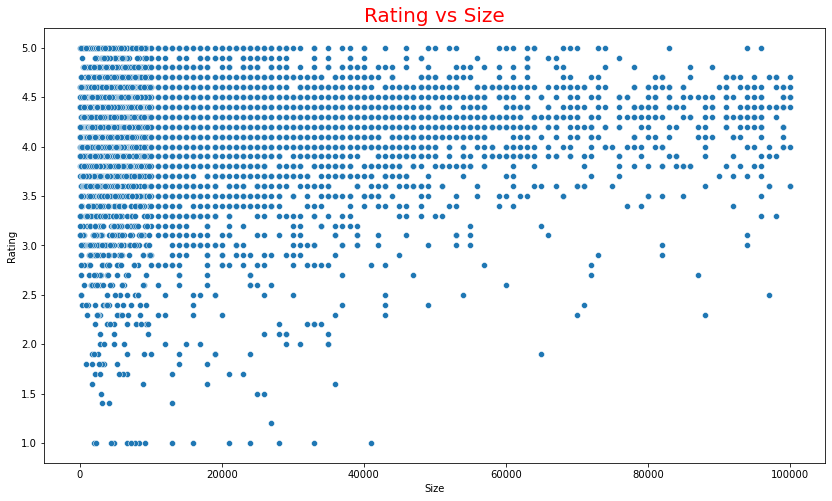

In [43]:
plt.figure(figsize=[14,8])
sns.scatterplot(x='Size', y='Rating',data=df)
plt.title('Rating vs Size',loc='Center', fontsize=20, color='red')
plt.show()

# It can be observed that largers apps have higher ratings

**8.3 Make scatter plot/joinplot for Rating vs. Reviews**

--Does more review mean a better rating always?



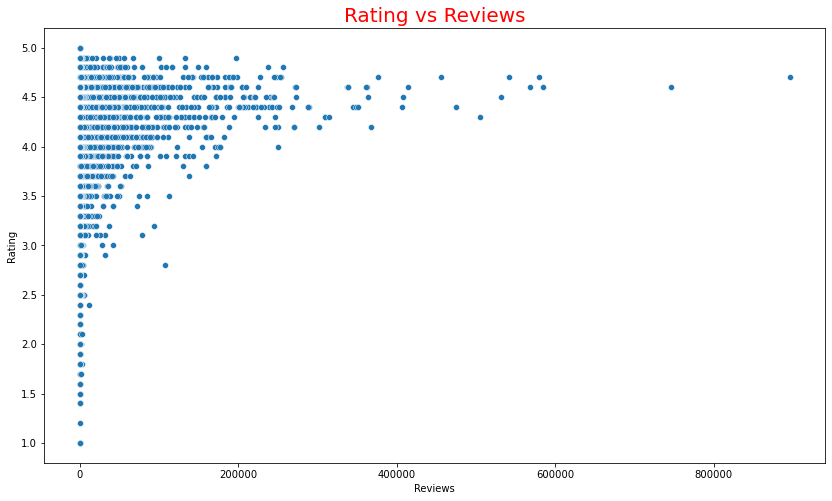

In [44]:
plt.figure(figsize=[14,8])
sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.title('Rating vs Reviews', loc='center', fontsize= 20,color='Red')
plt.show()

#  Scatter plot indicates higher rating apps having Max reviews

**8.4 Make boxplot for Rating vs. Content Rating**

--Is there any difference in the ratings? Are some types liked better?

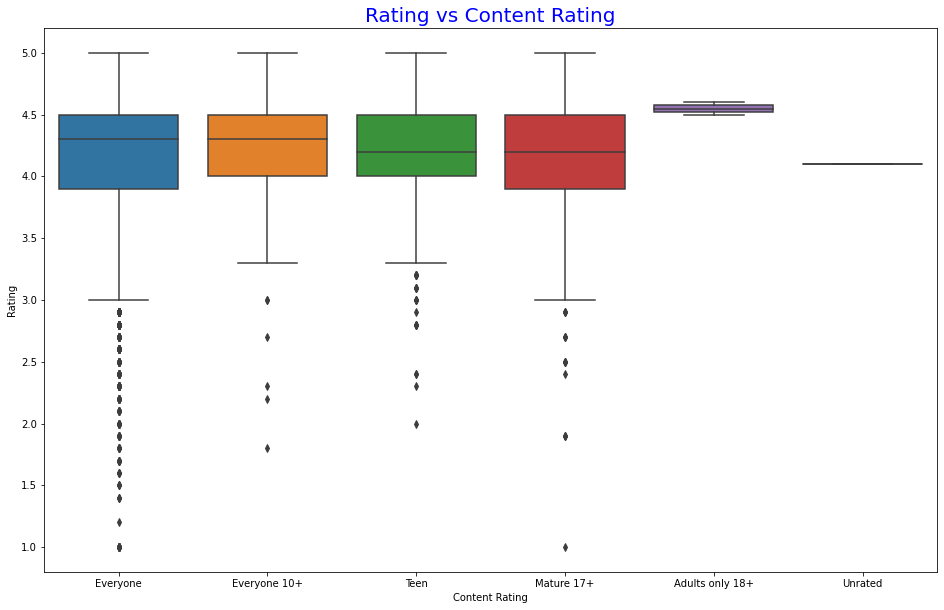

In [71]:
plt.figure(figsize=[16,10])
sns.boxplot(x='Content Rating', y='Rating', data=df)
plt.title('Rating vs Content Rating', loc='center', fontsize=20, color='blue')

plt.show()

# adult only 18+ has higher ratings with no outliers and rest others are almost the same 

**7:5 Make boxplot for Ratings vs. Category**

--Which genre has the best ratings?

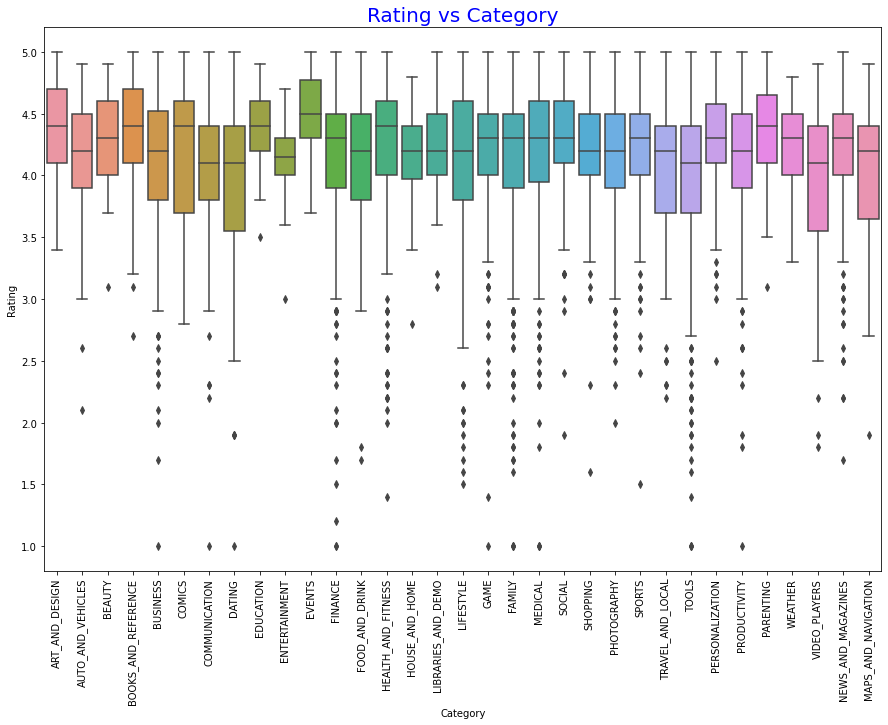

In [70]:
plt.figure(figsize=[15,10])
sns.boxplot(x='Category', y='Rating', data=df)
plt.title('Rating vs Category', loc='center', fontsize=20, color='blue')
plt.xticks(rotation=90)
plt.show()

# by looking at the boxplot we can see that Event Genre has the best rating with  no outliers

## 8. Data preprocessing



For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

- Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

- Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

- Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [47]:
inp1 = df.copy()

In [48]:
inp1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,formated_size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000.0


In [49]:
inp1.shape # all the records copied

(6489, 14)

In [50]:
inp1.Reviews = np.log1p(inp1.Reviews)
inp1.Installs= np.log1p(inp1.Installs)

In [51]:
# drop colums App, Last Updated, Current Ver, and Android Ver
inp1.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

In [52]:
inp1.shape  # all 4 columns are now removed

(6489, 10)

In [53]:
# Get dummy columns for Category, Genres, and Content Rating
inp2 = pd.get_dummies( inp1, columns= ['Category', 'Genres', 'Content Rating','Type'])

In [54]:
inp2.head(2)

,Rating,Reviews,Size,Installs,Price,formated_size,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Free,Type_Paid
0,4.1,5.075174,19000.0,9.210440,0.0,19000.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,3.9,6.875232,14000.0,13.122365,0.0,14000.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [55]:
inp2.shape

(6489, 155)

## 9: Train test split and apply 70-30 split. Name the new dataframes df_train and df_test.

In [58]:
# splitting the dataset into 70%-train and 30%-test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp2, test_size=0.3,random_state=100)


## 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [59]:
y_train = df_train.pop('Rating')
X_train = df_train

In [60]:
X_train.shape

(4542, 154)

In [61]:
y_train.shape

(4542,)

In [62]:
y_test = df_test.pop("Rating")
X_test = df_test

In [63]:
X_test.shape

(1947, 154)

In [64]:
y_test.shape

(1947,)

## 11 . Model building

- Use linear regression as the technique

- Report the R2 on the train set

In [65]:
# Model Builiding using Linear Regression

# importing LinearRegression package from SciKit Learn

from sklearn.linear_model import LinearRegression

In [66]:
#initialize the model in a variable
model = LinearRegression()

#looking for best fit line
model.fit(X_train, y_train)

LinearRegression()

In [67]:
# importing R2 Score package from Scikit Learn to compute R2 Scores

from sklearn.metrics import r2_score
y_train_pred= model.predict(X_train)

print("R2 Score by train is:", r2_score(y_train, y_train_pred))


R2 Score by train is: 0.14998979685933755


- So, the R2 Score is really low that means this model did not perform well and is not the best fit for this dataset. We would need to try some other algorithm for the best possible fit. 

## End of the Project !!!